# Analiza PM2.5 - projekt 3

### Zadanie 1

In [1]:
from get_data import make_pm25_data
from stats import *
from plots import *
import pandas as pd
import importlib

In [2]:
gios_url_ids = {
    2014: "302",
    2015: "236" ,
    2018: "603",
    2019: "322", 
    2021: "486",
    2024: "582", 
    "meta": "622"}

gios_pm25_file = {
    2014: "2014_PM2.5_1g.xlsx",
    2015: "2015_PM25_1g.xlsx",
    2018: "2018_PM25_1g.xlsx",
    2019: "2019_PM25_1g.xlsx",
    2021: "2021_PM25_1g.xlsx",
    2024: "2024_PM25_1g.xlsx",
}

years = [2015, 2018, 2021, 2024]

clean_info = {
    2015: {"header_row":0 , "drop_rows": [0, 1, 2]},
    2018: {"header_row": 1, "drop_rows": [0, 1, 2, 3, 4, 5]},
    2021: {"header_row": 1, "drop_rows": [0, 1, 2, 3, 4,5]},
    2024: {"header_row": 1, "drop_rows": [0, 1, 2, 3, 4, 5]}
}

df_pm25, meta = make_pm25_data(
    years=years,
    gios_url_ids=gios_url_ids,
    gios_pm25_file=gios_pm25_file,
    clean_info=clean_info,
    outfile="PM25.csv"
)

df_pm25.head(10)




Miejscowość                datetime Jelenia Góra      Wrocław               \
Kod stacji                          DsJelGorOgin DsWrocAlWisn DsWrocWybCon   
0           2015-01-01 01:00:00.000      151.112           78           50   
1           2015-01-01 02:00:00.000      262.566           42      33.8244   
2           2015-01-01 03:00:00.005       222.83           27      28.7215   
3           2015-01-01 04:00:00.010      210.767           24      20.6891   
4           2015-01-01 05:00:00.015      191.211           22      22.5335   
5           2015-01-01 06:00:00.020      114.636           19      18.5107   
6           2015-01-01 07:00:00.025      21.4669           23      27.4382   
7           2015-01-01 08:00:00.030      19.7269           32      23.8024   
8           2015-01-01 09:00:00.035      26.6903           38      32.6736   
9           2015-01-01 10:00:00.040      25.9544           38       38.217   

Miejscowość    Bydgoszcz                    Lublin         Łódź       Zgierz  \
Kod stacji  KpBydPlPozna KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz   
0                   29.2         95.5      71.1012        59.73    58.690689   
1                   27.1         86.1      95.2582       185.92    44.501255   
2                    7.9         23.8      49.5078        54.25    24.163937   
3                    7.1         15.9      60.8468        50.15    19.516039   
4                    9.2           15      49.3106        39.17    16.850332   
5                    7.1         12.7      39.6478        27.67    17.975487   
6                    5.3         11.6      35.6052        19.07    16.226292   
7                    7.6         11.8      37.1828        20.86    17.142969   
8                   10.5         13.5      35.0136        21.02    20.666599   
9                   10.7         17.9      32.0556        19.85    23.429361   

Miejscowość Zielona Góra  ...     Warszawa                  Żyrardów  \
Kod stacji  LuZielKrotka  ... MzWarAlNiepo MzWarWokalna MzZyraRoosev   
0                    NaN  ...      71.8204    68.982316    86.182337   
1                51.8628  ...      42.6996    48.707108    61.823362   
2                 15.866  ...      38.2824    37.986883    58.974359   
3                20.1187  ...      35.4194    33.675489    53.276353   
4                27.3413  ...      31.7384     29.24757    44.586895   
5                25.8225  ...      29.2844    26.334465    40.740741   
6                26.4438  ...      27.8938    24.120506    34.757835   
7                30.1887  ...      24.4582    20.857829     29.91453   
8                 33.429  ...      22.4132    19.343014    28.062678   
9                35.8621  ...       22.086    19.692587    28.632479   

Miejscowość Kędzierzyn-Koźle    Białystok     Przemyśl     Katowice  \
Kod stacji      OpKKozBSmial PdBialUpalna PkPrzemGrunw SlKatoKossut   
0                         43           67      18.9027       51.389   
1                    54.5611          103      15.9257       37.709   
2                       54.3           49      16.1709       41.984   
3                      48.45           37      16.0252       45.404   
4                    48.7667           27      15.5498       36.854   
5                    48.5222           25      15.5701       35.999   
6                    47.2167           18      15.5822       35.144   
7                    47.7583           20      17.0011       36.854   
8                    32.9111           17      17.6716       38.564   
9                          0           18      18.8466       42.839   

Miejscowość  Złoty Potok      Olsztyn       Kalisz  
Kod stacji  SlZlotPotLes WmOlsPuszkin WpKaliSawick  
0                49.9464    44.060833         25.5  
1                45.6291    49.943329         32.5  
2                49.2093    20.688448         24.3  
3                 53.316    17.437717         24.4  
4                51.5259    15.532262           25  
5            

\\wsl.localhost\Ubuntu\home\wojtekl\ztp3\stats.py:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(["Miejscowość", "Kod stacji"])


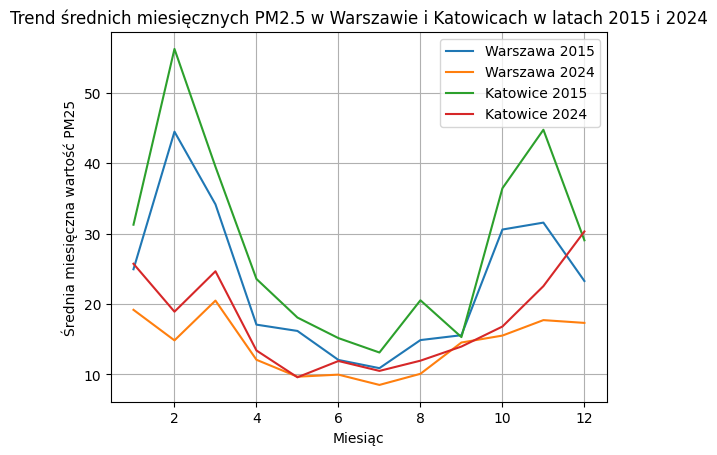

In [3]:
df_pm25_converted = convert_df(df_pm25)
monthly_means = calc_monthly_means(df_pm25_converted)

plot_means(monthly_means, cities=["Warszawa", "Katowice"], years=[2015, 2024])

C:\Users\Wojtek\AppData\Local\Temp\ipykernel_25148\3352822631.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  heatmaps.show()


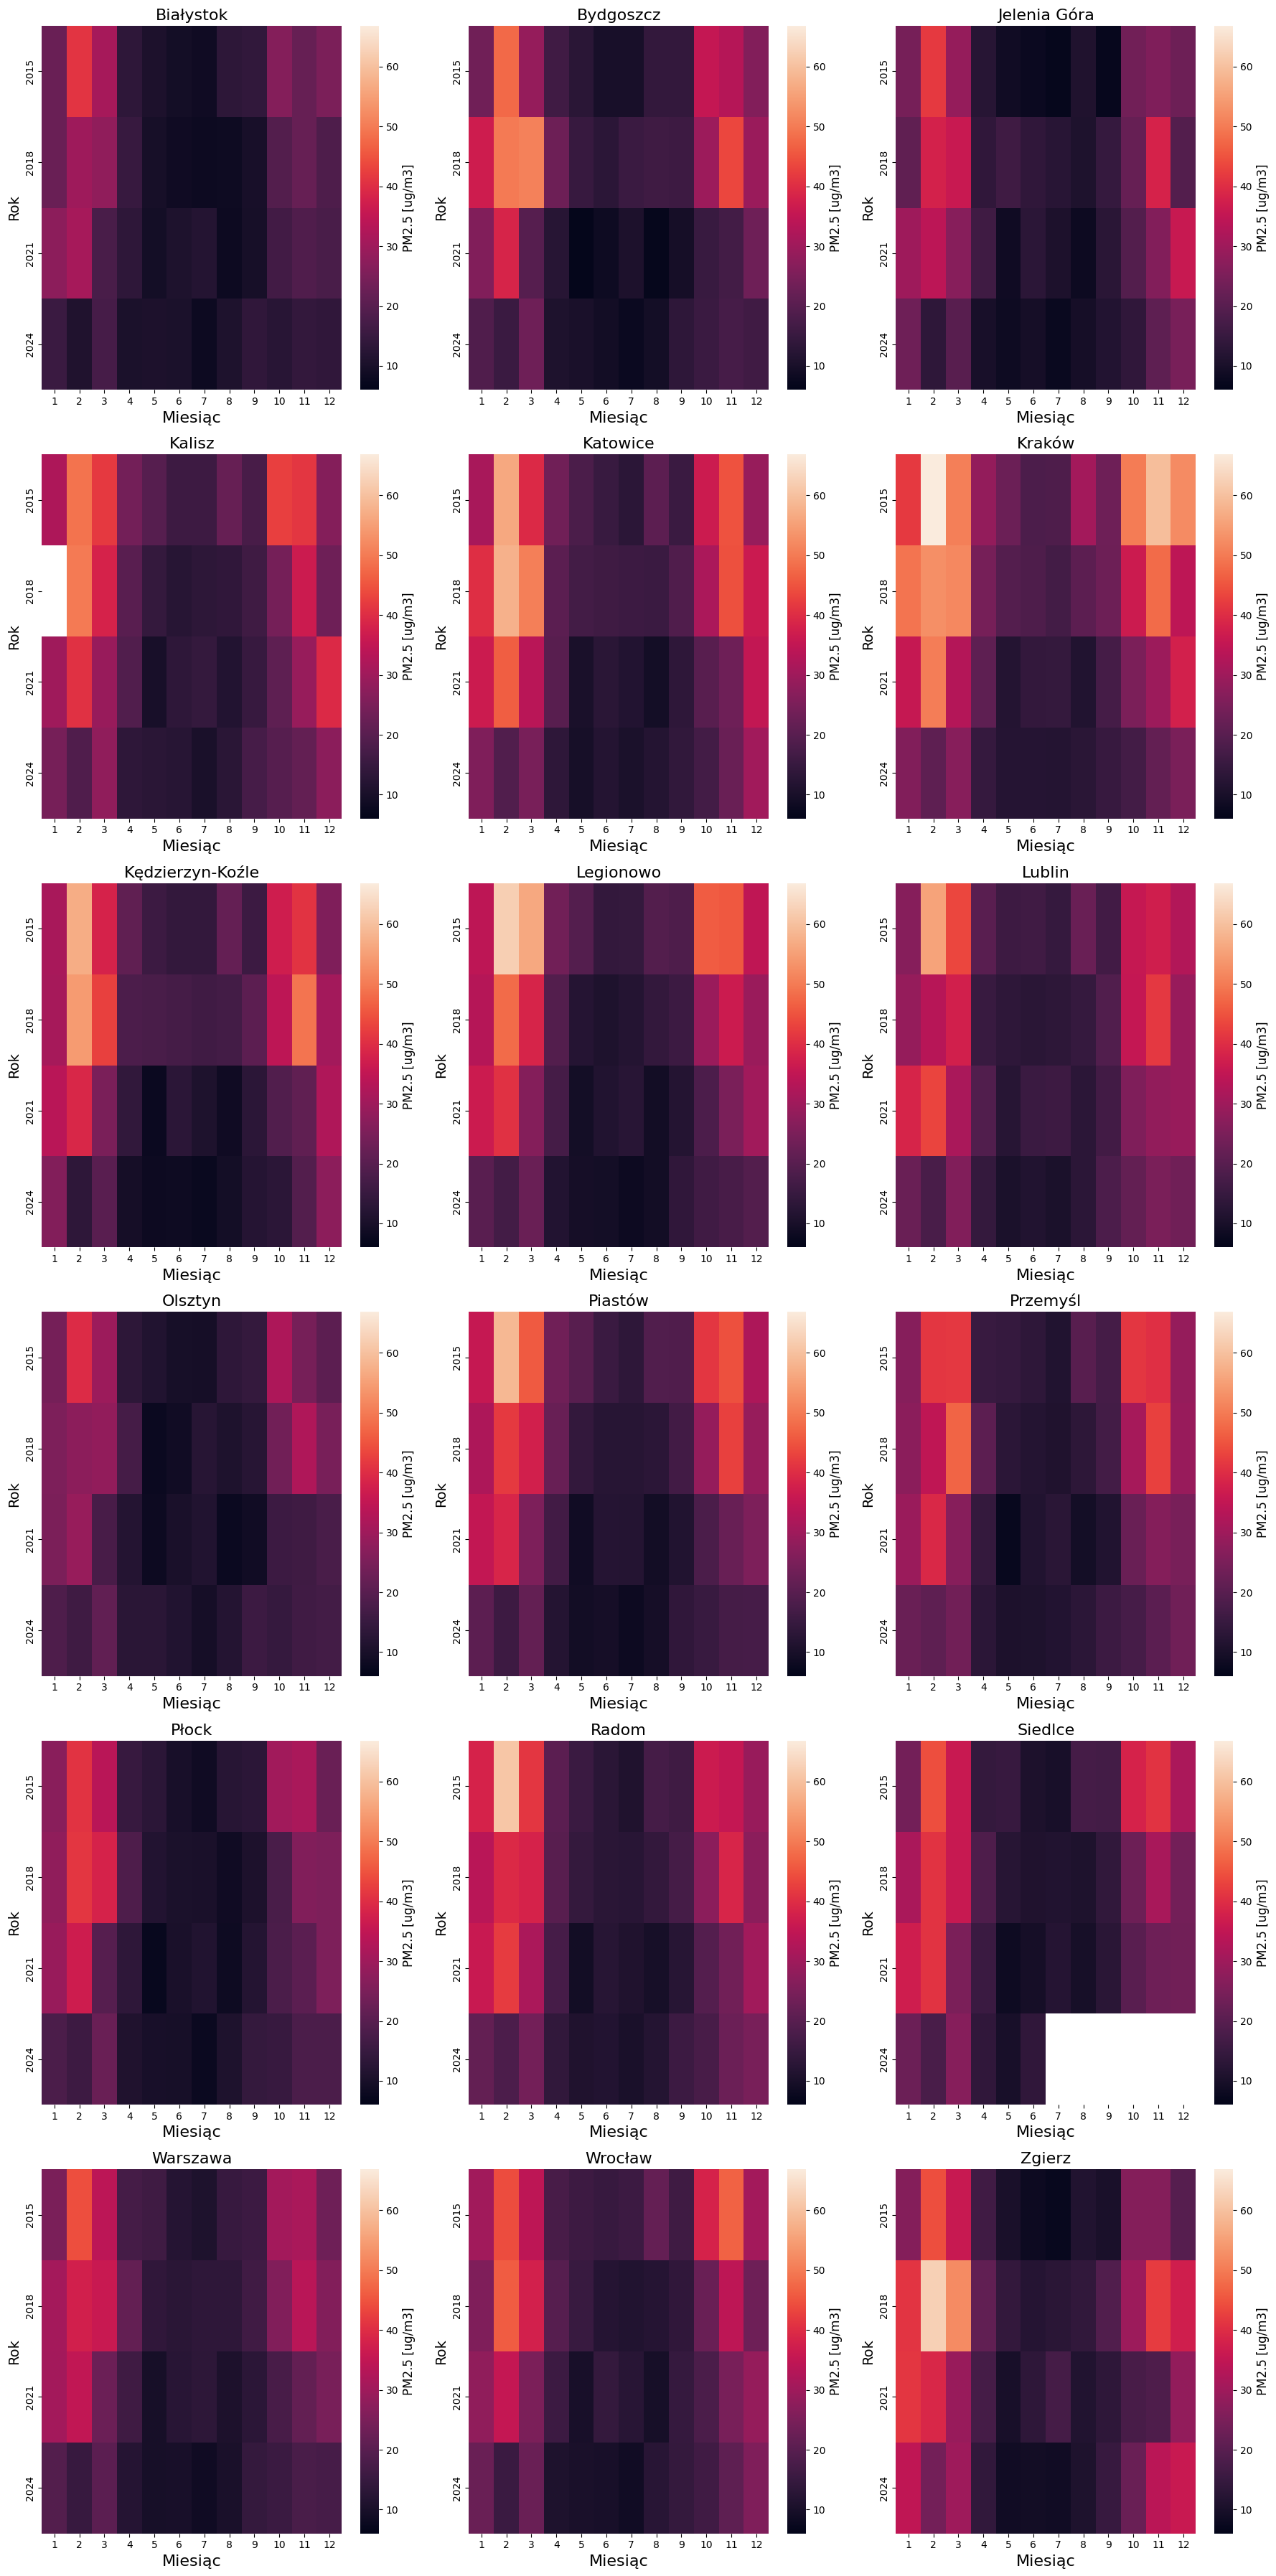

In [4]:
city_monthly = calc_monthly_city_means(monthly_means)
heatmaps = heatmaps_means(city_monthly, years=[2015, 2018, 2021, 2024])
heatmaps.show()

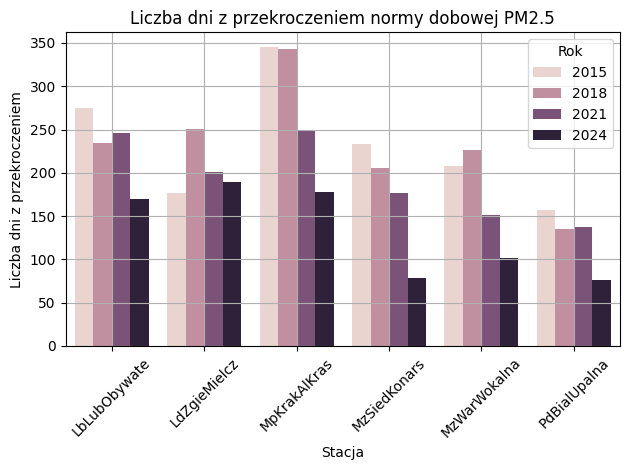

In [6]:
daily = calc_daily_means(df_pm25_converted)
over_counts = count_overnorm_days(daily, threshold=15.0)
selected = top_bottom_stations(over_counts, year=2024, n=3)
plot_overnorm(over_counts, selected, years=[2015, 2018, 2021, 2024])